In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from skimage.segmentation import slic, mark_boundaries
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow.keras.losses import CategoricalCrossentropy


In [2]:
with open('train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('valid.p', 'rb') as f:
    valid_data = pickle.load(f)
with open('test.p', 'rb') as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
n_classes = len(set(y_train))

In [3]:
print ( " Training Set : " , len ( X_train ) )
print ( " Test Set : " , len ( X_test ) )
print ( " Validation Set : " , len ( X_valid ) )
print ( " Image Dimensions : " , np . shape ( X_train [1]) )
print ( " Number of classes : " , len ( np . unique ( y_train ) ) )
n_classes = len ( np . unique ( y_train ) )
print ( np . max ( X_train ) )

 Training Set :  34799
 Test Set :  12630
 Validation Set :  4410
 Image Dimensions :  (32, 32, 3)
 Number of classes :  43
255


In [4]:
label_names = open('signnames.csv').read().strip().split("\n")[1:]
label_names

['0,Speed limit (20km/h)',
 '1,Speed limit (30km/h)',
 '2,Speed limit (50km/h)',
 '3,Speed limit (60km/h)',
 '4,Speed limit (70km/h)',
 '5,Speed limit (80km/h)',
 '6,End of speed limit (80km/h)',
 '7,Speed limit (100km/h)',
 '8,Speed limit (120km/h)',
 '9,No passing',
 '10,No passing for vehicles over 3.5 metric tons',
 '11,Right-of-way at the next intersection',
 '12,Priority road',
 '13,Yield',
 '14,Stop',
 '15,No vehicles',
 '16,Vehicles over 3.5 metric tons prohibited',
 '17,No entry',
 '18,General caution',
 '19,Dangerous curve to the left',
 '20,Dangerous curve to the right',
 '21,Double curve',
 '22,Bumpy road',
 '23,Slippery road',
 '24,Road narrows on the right',
 '25,Road work',
 '26,Traffic signals',
 '27,Pedestrians',
 '28,Children crossing',
 '29,Bicycles crossing',
 '30,Beware of ice/snow',
 '31,Wild animals crossing',
 '32,End of all speed and passing limits',
 '33,Turn right ahead',
 '34,Turn left ahead',
 '35,Ahead only',
 '36,Go straight or right',
 '37,Go straight or

###Distribution of class labels

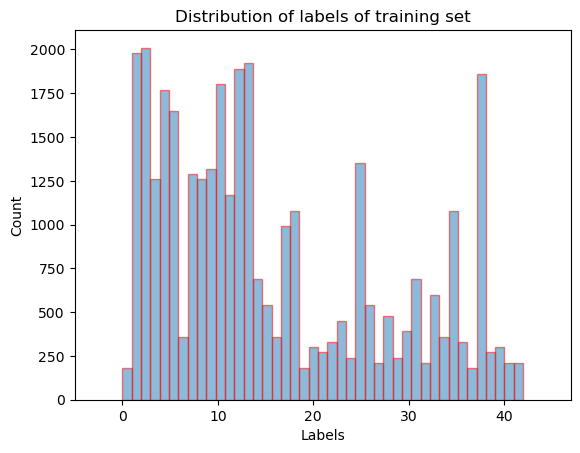

In [5]:
# The distribution of labels of training set
plt.xlim([ min (y_train)- 5 , max (y_train)+ 5 ])

plt.hist(y_train, bins=43, alpha=0.5, edgecolor='red')
plt.title('Distribution of labels of training set')
plt.xlabel('Labels')
plt.ylabel('Count')

plt.show()

In [6]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0  180]
 [   1 1980]
 [   2 2010]
 [   3 1260]
 [   4 1770]
 [   5 1650]
 [   6  360]
 [   7 1290]
 [   8 1260]
 [   9 1320]
 [  10 1800]
 [  11 1170]
 [  12 1890]
 [  13 1920]
 [  14  690]
 [  15  540]
 [  16  360]
 [  17  990]
 [  18 1080]
 [  19  180]
 [  20  300]
 [  21  270]
 [  22  330]
 [  23  450]
 [  24  240]
 [  25 1350]
 [  26  540]
 [  27  210]
 [  28  480]
 [  29  240]
 [  30  390]
 [  31  690]
 [  32  210]
 [  33  599]
 [  34  360]
 [  35 1080]
 [  36  330]
 [  37  180]
 [  38 1860]
 [  39  270]
 [  40  300]
 [  41  210]
 [  42  210]]


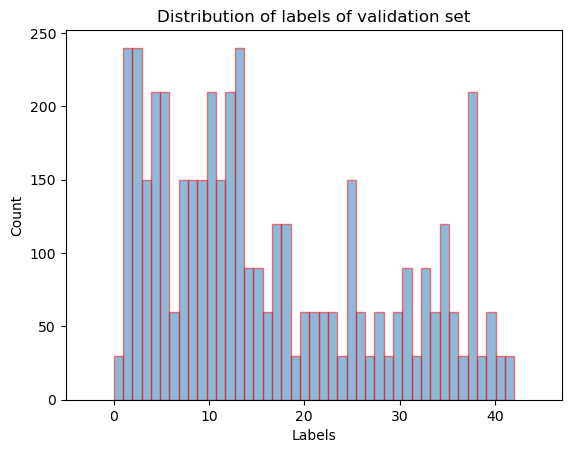

In [7]:
# The distribution of labels of validation set
plt.xlim([ min (y_valid)- 5 , max (y_valid)+ 5 ])

plt.hist(y_valid, bins=43, alpha=0.5, edgecolor='red')
plt.title('Distribution of labels of validation set')
plt.xlabel('Labels')
plt.ylabel('Count')

plt.show()

In [8]:
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0  180]
 [   1 1980]
 [   2 2010]
 [   3 1260]
 [   4 1770]
 [   5 1650]
 [   6  360]
 [   7 1290]
 [   8 1260]
 [   9 1320]
 [  10 1800]
 [  11 1170]
 [  12 1890]
 [  13 1920]
 [  14  690]
 [  15  540]
 [  16  360]
 [  17  990]
 [  18 1080]
 [  19  180]
 [  20  300]
 [  21  270]
 [  22  330]
 [  23  450]
 [  24  240]
 [  25 1350]
 [  26  540]
 [  27  210]
 [  28  480]
 [  29  240]
 [  30  390]
 [  31  690]
 [  32  210]
 [  33  599]
 [  34  360]
 [  35 1080]
 [  36  330]
 [  37  180]
 [  38 1860]
 [  39  270]
 [  40  300]
 [  41  210]
 [  42  210]]


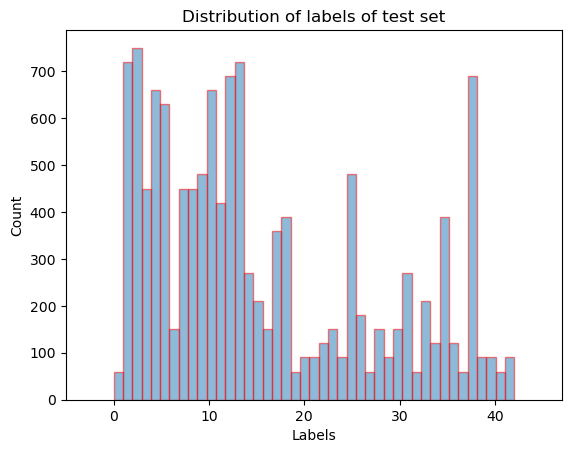

In [9]:
plt.xlim([ min (y_test)- 5 , max (y_test)+ 5 ])

plt.hist(y_test, bins=43, alpha=0.5, edgecolor='red')
plt.title('Distribution of labels of test set')
plt.xlabel('Labels')
plt.ylabel('Count')

plt.show()

In [10]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0  60]
 [  1 720]
 [  2 750]
 [  3 450]
 [  4 660]
 [  5 630]
 [  6 150]
 [  7 450]
 [  8 450]
 [  9 480]
 [ 10 660]
 [ 11 420]
 [ 12 690]
 [ 13 720]
 [ 14 270]
 [ 15 210]
 [ 16 150]
 [ 17 360]
 [ 18 390]
 [ 19  60]
 [ 20  90]
 [ 21  90]
 [ 22 120]
 [ 23 150]
 [ 24  90]
 [ 25 480]
 [ 26 180]
 [ 27  60]
 [ 28 150]
 [ 29  90]
 [ 30 150]
 [ 31 270]
 [ 32  60]
 [ 33 210]
 [ 34 120]
 [ 35 390]
 [ 36 120]
 [ 37  60]
 [ 38 690]
 [ 39  90]
 [ 40  90]
 [ 41  60]
 [ 42  90]]
